# Programming for Data Science and Artificial Intelligence

## Pandas

### Readings: 
- [VANDER] Ch3
- https://pandas.pydata.org/docs/

In [1]:
# Pandas is built on top of NumPy
#   it means that Pandas, in a very raw level, is actually nothing but NumPy array
#   pandas has added functionality, like dealing with missing values, for example

# so why NumPy?  Why not use Pandas always?
# Pandas is MUCH slower than NumPy

### Import Pandas

In [6]:
import pandas as pd

In [7]:
pandas.__version__

'1.4.3'

# 1. Extract-Transform-Load (ETL) 

### Load csv file

In [8]:
#the name of data that pandas called, is "Dataframe"
df = pd.read_csv("howlongwelive.csv")

### Preview the dataframe

In [9]:
#you use df.head()
#format: df.head(number of rows; default is 5; you can also put negative numbers)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [10]:
#as I say, Pandas IS NumPy
df.shape

#means that there are 2938 rows, and 22 columns

(2938, 22)

In [11]:
#maybe you want a list of columns
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

# 2. Exploratory Data Analysis
- looking at the distribution of data
- plot something useful
- understand the data
  
Note: **this is the MOST important step in all data science**

In [14]:
## related seaborn
#df.info()

#list the datatypes of the dataframe
#key: we DON'T LIKE "object" ==> "string"

#so when you "object", you change it to numbers or drop it

In [15]:
#two ways to access each column
#format1:  df['colname']
#format2:  df.colname
df['Status']  #try df.Status

0       Developing
1       Developing
2       Developing
3       Developing
4       Developing
           ...    
2933    Developing
2934    Developing
2935    Developing
2936    Developing
2937    Developing
Name: Status, Length: 2938, dtype: object

In [16]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [24]:
developing_cond = df['Status'] == 'Developing'
developed_cond  = df['Status'] == 'Developed'

In [25]:
print("Number of developing countries: ", 
      len(df.Status[developing_cond]))

print ("Number of developed countries: ", 
       df.Status[developed_cond].count())

Number of developing countries:  2426
Number of developed countries:  512


In [27]:
df.Status[developed_cond].shape[0]

512

In [29]:
df['Alcohol'].max()  #try min(), mean(), median()

17.87

In [31]:
df.Alcohol.min(), df.Alcohol.mean(), df.Alcohol.median()

(0.01, 4.602860787172012, 3.755)

In [43]:
#exercise: get the rows with alcohol more than the median
#and count
#challenge: list these unique countries

#Answer:
#fancy_indexes = df.Alcohol > df.Alcohol.median()
#df.Country[fancy_indexes].unique()

In [45]:
#exercise2: get the list of country
#with Schooling more than the median
#and GDP more than the median

cond1 = df.Schooling > df.Schooling.median()
cond2 = df.GDP > df.GDP.median()

countries = df.Country[cond1 & cond2].unique()

type(countries)

numpy.ndarray

In [46]:
#for any columns of continuous value, 
# it gives you count, mean, std, min, etc.
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [48]:
#use some easy library for visualization
#it accepts input as dataframe
import seaborn as sns
#seaborn: super easy library for visualization
#it's built on top of matplotlib 
#matplotlib is the classic python library for visualization

#if i want to predict egg price, using gold and oil prices
#we called gold and oil prices MANY names
#   features, factors, independent variables, predictors, X
#   here, gold is called x_1, oil is called x_2
#we called egg price MANY names
#   labels, targets, outcomes, dependent variables, y

<AxesSubplot:xlabel='Status', ylabel='count'>

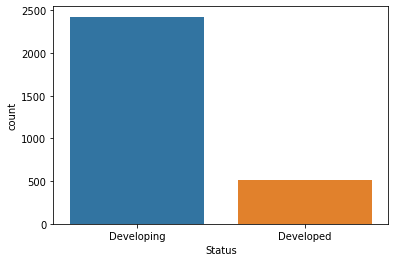

In [56]:
#1. countplot is to plot the discrete x_1 or y
sns.countplot(data = df, x="Status")

In [51]:
sns.__version__

'0.11.2'

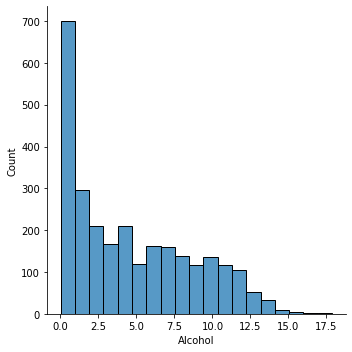

In [55]:
#2. distplot or displt is to plot the continuous x_1 or y
sns.displot(df.Alcohol)  #==> you get error, this is because your version is not >0.10

#exercise: try displot for another continuous variable

In [62]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [66]:
'''
format: .rename(
    columns =
    {oldname: newname,
     oldname2: newname2,
     oldname3: newname3}
)
'''
df = df.rename(
    columns = {'Life expectancy ': 'life-exp',
               'Income composition of resources' : 'income',
               'Schooling' : 'schooling'}
)

# df.head()

#tips:  if you don't want to do df=, just put a argument inplace=True
#exercise: can you change 
#   Income composition of resources to income, 
#   Schooling to schooling and 
#   Status to status

,Country,Year,Status,life-exp,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,income,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [78]:
#challenge: help clear all the spaces in the columns
import numpy as np
df.columns = df.columns.str.strip()

df.columns

Index(['Country', 'Year', 'Status', 'life-exp', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income', 'schooling'],
      dtype='object')

<AxesSubplot:xlabel='Status', ylabel='life-exp'>

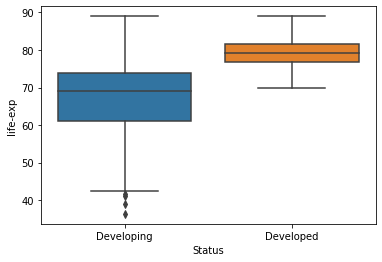

In [80]:
#3. boxplot is to plot discrete x_1 vs. continuous x_2/y
sns.boxplot(x = df['Status'], y = df['life-exp'])

<AxesSubplot:xlabel='Alcohol', ylabel='life-exp'>

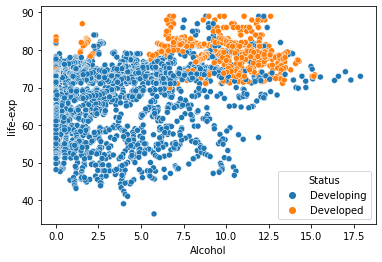

In [82]:
#4. scatterplot is to plot continuous x_1 vs. continuous x_2/y
#hue MUST be a discrete variable
sns.scatterplot(x = df['Alcohol'], y = df['life-exp'], hue = df['Status'])

#exercise, find me the features that have very strong correlation with life-exp
#exercise, which features have almost NO relationship with life exp